# Data Set
## x : words index , y positive or negative opinion
### num_words : Rank by frequency

In [2]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000) 

Using TensorFlow backend.


In [0]:
x_val = x_train[20000:]
y_val = y_train[20000:]

x_train = x_train[:20000]
y_train = y_train[:20000]

In [0]:
from keras.preprocessing import sequence 
x_train = sequence.pad_sequences(x_train, maxlen=200)
x_val = sequence.pad_sequences(x_val, maxlen=200)
x_test = sequence.pad_sequences(x_test, maxlen=200)

In [5]:
from keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from keras.models import Sequential
model = Sequential()
model.add(Embedding(20000, 128, input_length=200))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

W0806 05:09:52.709798 139777916827520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0806 05:09:52.748249 139777916827520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0806 05:09:52.757869 139777916827520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0806 05:09:52.783534 139777916827520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0806 05:09:52.797386 

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


W0806 05:09:54.060127 139777916827520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0806 05:09:54.139326 139777916827520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0806 05:09:54.152149 139777916827520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))


Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 148s 7ms/step - loss: 0.4658 - acc: 0.7581 - val_loss: 0.2995 - val_acc: 0.8730
Epoch 2/25
20000/20000 [==============================] - 147s 7ms/step - loss: 0.2148 - acc: 0.9137 - val_loss: 0.2594 - val_acc: 0.8924
Epoch 3/25
20000/20000 [==============================] - 147s 7ms/step - loss: 0.0831 - acc: 0.9738 - val_loss: 0.2968 - val_acc: 0.8944
Epoch 4/25
20000/20000 [==============================] - 146s 7ms/step - loss: 0.0207 - acc: 0.9952 - val_loss: 0.3639 - val_acc: 0.8862
Epoch 5/25
20000/20000 [==============================] - 148s 7ms/step - loss: 0.0056 - acc: 0.9995 - val_loss: 0.4215 - val_acc: 0.8886
Epoch 6/25
20000/20000 [==============================] - 147s 7ms/step - loss: 0.0019 - acc: 0.9999 - val_loss: 0.4299 - val_acc: 0.8936
Epoch 7/25
20000/20000 [==============================] - 147s 7ms/step - loss: 7.8404e-04 - acc: 1.0000 - val_loss: 0.4659

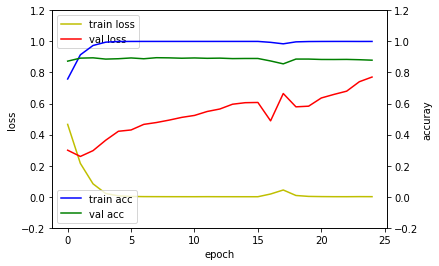

25000/25000 [==============================] - 40s 2ms/step
## evaluation loss and_metrics ##
[0.8195754267311096, 0.8708799999618531]


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

In [9]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 198, 256)          98560     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para